In [1]:
# Upload Kaggle API

!pip install --upgrade -q kaggle

In [2]:
!mkdir -p /root/.kaggle 
!mv kaggle.json /root/.kaggle/

In [3]:
import kaggle

In [4]:
!kaggle competitions download -c dogs-vs-cats

 99% 540M/543M [00:03<00:00, 171MB/s]
100% 543M/543M [00:03<00:00, 172MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 84.8MB/s]
 98% 267M/271M [00:01<00:00, 171MB/s]
100% 271M/271M [00:01<00:00, 175MB/s]


In [5]:
!unzip -q train.zip

In [ ]:
!ls train

In [2]:
import os 

In [3]:
len(os.listdir("train")) # Will list the number of images in a directory

25000

In [4]:
os.listdir("train")[:10]

['cat.319.jpg',
 'cat.10243.jpg',
 'dog.8780.jpg',
 'cat.11608.jpg',
 'cat.2916.jpg',
 'cat.8114.jpg',
 'dog.790.jpg',
 'cat.2568.jpg',
 'dog.12476.jpg',
 'cat.11968.jpg']

In [5]:
from PIL import Image

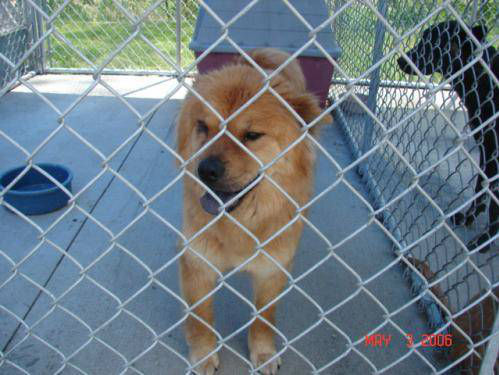

In [6]:
Image.open("train/dog.8780.jpg")

In [7]:
import cv2

In [8]:
cv2.imread("train/dog.8780.jpg")

array([[[114, 108,  95],
        [136, 130, 117],
        [132, 125, 110],
        ...,
        [127, 137, 107],
        [127, 144, 111],
        [129, 146, 113]],

       [[114, 106,  93],
        [145, 137, 124],
        [150, 143, 128],
        ...,
        [133, 145, 117],
        [132, 150, 119],
        [131, 149, 118]],

       [[119, 110,  97],
        [153, 144, 131],
        [176, 167, 153],
        ...,
        [108, 123,  96],
        [105, 124,  97],
        [102, 121,  94]],

       ...,

       [[132, 110,  85],
        [128, 106,  81],
        [126, 104,  79],
        ...,
        [ 39,  31,  31],
        [ 52,  48,  43],
        [ 66,  62,  57]],

       [[124, 102,  77],
        [122, 100,  75],
        [122, 100,  75],
        ...,
        [ 40,  32,  32],
        [ 53,  49,  44],
        [ 67,  63,  58]],

       [[123, 101,  76],
        [119,  97,  72],
        [119,  97,  72],
        ...,
        [ 39,  31,  31],
        [ 53,  49,  44],
        [ 66,  62,  57]]

In [9]:
test_dog = cv2.imread("train/dog.8780.jpg")

In [9]:
test_dog.shape # 375 px - height ; # 499 px - width ; # 3 - channel => RGB colored image

(375, 499, 3)

In [10]:
test_cat = cv2.imread("train/cat.319.jpg")

In [11]:
test_cat.shape # This is a different shape than the previous image

(240, 319, 3)

In [11]:
import matplotlib.pyplot as plt

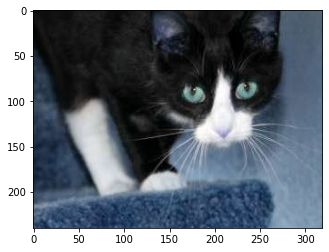

In [12]:
plt.imshow(test_cat)

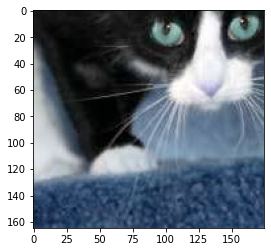

In [14]:
test_cat_crop = test_cat[75:250,75:250,:]
plt.imshow(test_cat_crop)

In [15]:
test_cat.shape

(240, 319, 3)

(150, 150, 3)


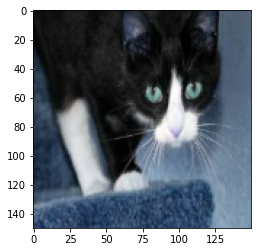

In [16]:
test_cat_resize = cv2.resize(test_cat,(150,150))
plt.imshow(test_cat_resize)
print(test_cat_resize.shape)

In [13]:
from tqdm import tqdm_notebook # Will create a progress bar



In [14]:
images = []
labels = []

for imageName in tqdm_notebook(os.listdir("train")):
  image = cv2.imread("train/"+imageName)
  image = cv2.resize(image, (150,150))
  images.append(image)
  if "dog" in imageName.lower():
    labels.append(1)
  else:
    labels.append(0) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [29]:
type(images), type(labels)

(list, list)

In [15]:
import numpy as np

In [16]:
images_arr = np.array(images)
labels_arr = np.array(labels)



In [17]:
del images
del labels 

In [18]:
type(images_arr), type(labels_arr)

(numpy.ndarray, numpy.ndarray)

In [19]:
images_arr.shape, labels_arr.shape

((25000, 150, 150, 3), (25000,))

In [20]:
# We are reducing the number of images because no enough RAM
images_arr = images_arr[:10000,:,:,:]
labels_arr = labels_arr[:10000]

In [21]:
%tensorflow_version 2.x 
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

In [22]:
images_arr = images_arr/255

labels_arr = to_categorical(labels_arr)



In [23]:
images_arr.shape, labels_arr.shape

((10000, 150, 150, 3), (10000, 2))

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy

In [25]:
from tensorflow.keras.optimizers import SGD

In [26]:
150*150*3

67500

In [28]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(128, activation=relu))
model.add(Dense(32, activation=relu))
model.add(Dense(2, activation=softmax))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8640128   
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 8,644,322
Trainable params: 8,644,322
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer=SGD(), loss=categorical_crossentropy, metrics=['acc'])



In [31]:
model.fit(images_arr, labels_arr, batch_size=32, epochs=20)



Epoch 1/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6199 - acc: 0.6499
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6182 - acc: 0.6544
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6139 - acc: 0.6586
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6102 - acc: 0.6578
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6014 - acc: 0.6708
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.5991 - acc: 0.6712
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 0.5965 - acc: 0.6762
Epoch 8/20
313/313 [==============================] - 3s 10ms/step - loss: 0.5925 - acc: 0.6769
Epoch 9/20
313/313 [==============================] - 3s 10ms/step - loss: 0.5875 - acc: 0.6796
Epoch 10/20
313/313 [==============================] - 3s 10ms/step - loss: 0.5828 - acc: 0.6835
Epoch 11/20
313/313 [==================

In [33]:
10000/32

312.5